In [1]:
import GCRCatalogs
from GCR import GCRQuery
## check version
print('GCRCatalogs =', GCRCatalogs.__version__, '|' ,'GCR =', GCRCatalogs.GCR.__version__)

GCRCatalogs = 0.10.0 | GCR = 0.8.7


Here is a quick demo of grabbing CosmoDC2v1.1.4 data using GCRquery.  You should run this notebook on the jupyter-dev interface at NERSC, using the desc-python kernel, which should have GCRcatalogs included.

CosmoDC2v1.1.4 is the extragalactic catalog that is being used for the objects that will be in the images that comprise run2.1. The colors are a bit more realistic than the ones from protoDC2 catalogs, and the colors in this catalog should match the colors in the "truth" catalog and images, which was also not true in run1.2/protoDC2.

As this is a mock catalog, there are no photometric errors.  We'll grab the ugrizy magnitudes and redshifts of the objects.  You can see all the different catalogs available with the `get available catalogs` command below, and see all of the quantities available once you load a particular catalog with `list_all_quantities(False)` (the False prints some extra columns that are hidden if you do not include the 'False').  If you need anything besides magnitudes and redshift, look through the list to see if it is available.

The catalog is pretty huge, it's 293 million galaxies that go to something like r=29 or so.  If you want to limit yourself to a reasonable set of, say, the LSST "gold" sample, you can do a cut of i<25 and implement it with a "filter" when you do the query.  This will save some space in memory if you're not going to use those faint galaxies anyway.

In [2]:
#use this to print all available catalogs, note the "False" to actually list them all
print('\n'.join(sorted(GCRCatalogs.get_available_catalogs(False))))

baseDC2_v0.4.5
baseDC2_v0.4.5_shear
baseDC2_v0.4.5_test
baseDC2_v1.1_9431_9812
baseDC2_v1.1_9556
baseDC2_v1.1_image
buzzard
buzzard_high-res
buzzard_high-res_v1.1
buzzard_test
buzzard_v1.6
buzzard_v1.6_1
buzzard_v1.6_2
buzzard_v1.6_21
buzzard_v1.6_3
buzzard_v1.6_5
buzzard_v1.6_test
cosmoDC2_v0.1
cosmoDC2_v0.1_test
cosmoDC2_v1.0
cosmoDC2_v1.0_10194_10452
cosmoDC2_v1.0_8786_9049
cosmoDC2_v1.0_9050_9430
cosmoDC2_v1.0_9431_9812
cosmoDC2_v1.0_9556
cosmoDC2_v1.0_9813_10193
cosmoDC2_v1.0_image
cosmoDC2_v1.0_image_addon_knots
cosmoDC2_v1.0_small
cosmoDC2_v1.1.3_small
cosmoDC2_v1.1.4_image
cosmoDC2_v1.1.4_image_addon_knots
cosmoDC2_v1.1.4_redmapper_v0.2.1py
cosmoDC2_v1.1.4_small
dc1
dc2_coadd_run1.1p
dc2_coadd_run1.1p_tract4850
dc2_eimages_run1.2i_visit-181898
dc2_eimages_run1.2p_visit-181898
dc2_instance_example1
dc2_instance_example2
dc2_object_run1.1p
dc2_object_run1.1p_tract4850
dc2_object_run1.2i
dc2_object_run1.2i_all_columns
dc2_object_run1.2i_all_columns_with_photoz
dc2_object_run1.2i_a

In [3]:
gc = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_small')

In [4]:
sorted(gc.list_all_quantities(False))

['A_v',
 'A_v_bulge',
 'A_v_disk',
 'Mag_true_Y_lsst_z0',
 'Mag_true_Y_lsst_z0_no_host_extinction',
 'Mag_true_g_lsst_z0',
 'Mag_true_g_lsst_z0_no_host_extinction',
 'Mag_true_g_sdss_z0',
 'Mag_true_g_sdss_z0_no_host_extinction',
 'Mag_true_i_lsst_z0',
 'Mag_true_i_lsst_z0_no_host_extinction',
 'Mag_true_i_sdss_z0',
 'Mag_true_i_sdss_z0_no_host_extinction',
 'Mag_true_r_lsst_z0',
 'Mag_true_r_lsst_z0_no_host_extinction',
 'Mag_true_r_sdss_z0',
 'Mag_true_r_sdss_z0_no_host_extinction',
 'Mag_true_u_lsst_z0',
 'Mag_true_u_lsst_z0_no_host_extinction',
 'Mag_true_u_sdss_z0',
 'Mag_true_u_sdss_z0_no_host_extinction',
 'Mag_true_y_lsst_z0',
 'Mag_true_y_lsst_z0_no_host_extinction',
 'Mag_true_z_lsst_z0',
 'Mag_true_z_lsst_z0_no_host_extinction',
 'Mag_true_z_sdss_z0',
 'Mag_true_z_sdss_z0_no_host_extinction',
 'R_v',
 'R_v_bulge',
 'R_v_disk',
 'bulge_to_total_ratio_i',
 'convergence',
 'dec',
 'dec_true',
 'ellipticity_1_bulge_true',
 'ellipticity_1_disk_true',
 'ellipticity_1_true',
 'elli

In [5]:
columns = ['mag_u_lsst','mag_g_lsst','mag_r_lsst','mag_i_lsst','mag_z_lsst','mag_y_lsst','redshift','ra','dec']

In [6]:
simple_cut = ['mag_i_lsst < 25.']

In [8]:
#data = gc.get_quantities(columns) #load the whole catalog with no cuts
data = gc.get_quantities(columns,filters = simple_cut)

In [9]:
print(len(data['redshift'])) #with no cuts, ~293 million!

8317284


In [10]:
#if you think of a cut after the fact, or just want to create a subset of your data indeces, use the ".mask" command
#gold_sample = GCRQuery('mag_i_lsst<25.').mask(data)

In [12]:
print(len(data['redshift']))

8317284


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
gr = data['mag_g_lsst'][::100]-data['mag_r_lsst'][::100]
ri = data['mag_r_lsst'][::100]-data['mag_i_lsst'][::100]

Text(0,0.5,'r-i')

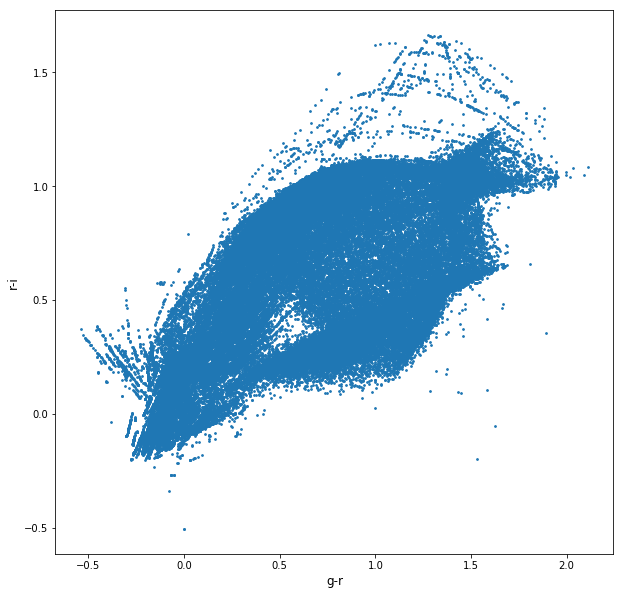

In [15]:
fig = plt.figure(figsize=(10,10))
plt.scatter(gr,ri,s=3)
plt.xlabel("g-r",fontsize=12)
plt.ylabel("r-i",fontsize=12)

Text(0,0.5,'dec')

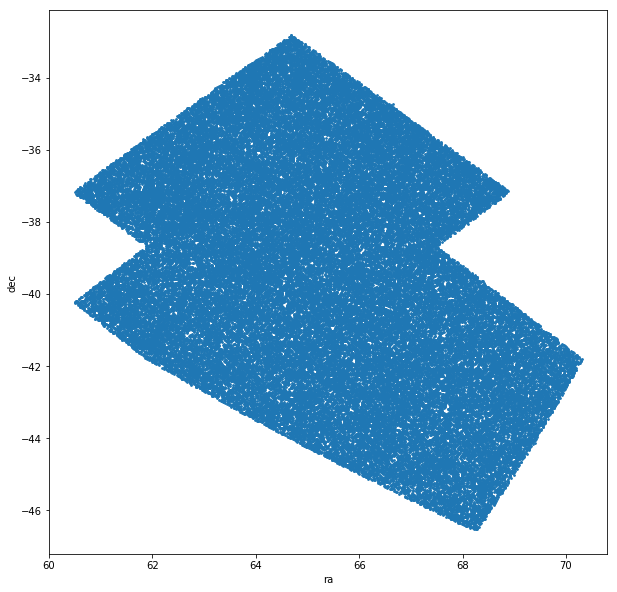

In [18]:
fig = plt.figure(figsize=(10,10))
plt.scatter(data['ra'][::100],data['dec'][::100],s=3)
plt.xlabel("ra",fontsize=10)
plt.ylabel("dec",fontsize=10)

You can see that CosmoDC2v1.1.4_small is just a couple of healpix pixels of ~50-ish sq. deg.  The full imaging catalog will be bigger, but this is what is in GCR for now